In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("datasets/st_louis_temp.csv", parse_dates=["Date"], date_format="%Y%m")
df.set_index("Date", inplace=True)
df.head()

,Value,Anomaly
Date,,
1938-04-01,57.3,0.8
1938-05-01,65.6,-0.8
1938-06-01,74.3,-1.4
1938-07-01,81.3,1.5
1938-08-01,82.0,4.0


In [4]:
df.replace(-99, pd.NA, inplace=True)

In [5]:
df.drop(columns="Anomaly", inplace=True)

In [6]:
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

In [7]:
df.interpolate(inplace=True)

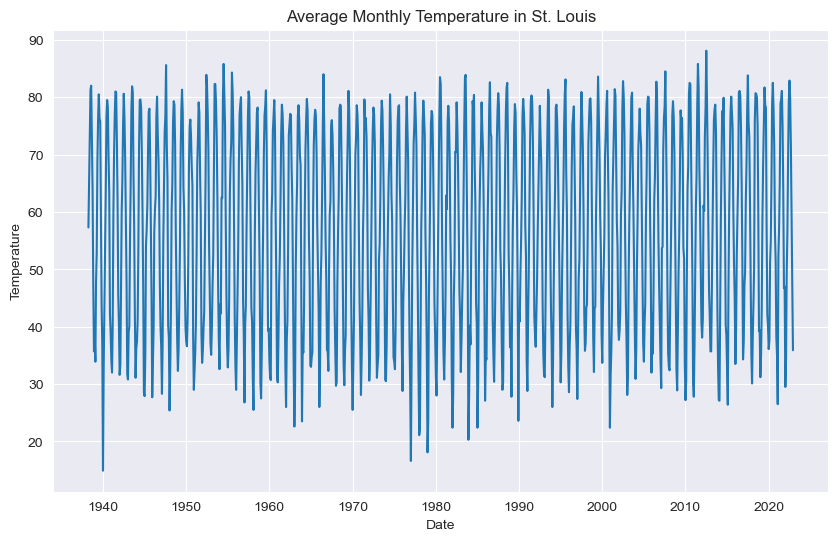

In [8]:
plt.figure(figsize=(10,6))
plt.plot(df.index, df["Value"])
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Average Monthly Temperature in St. Louis')
plt.show()

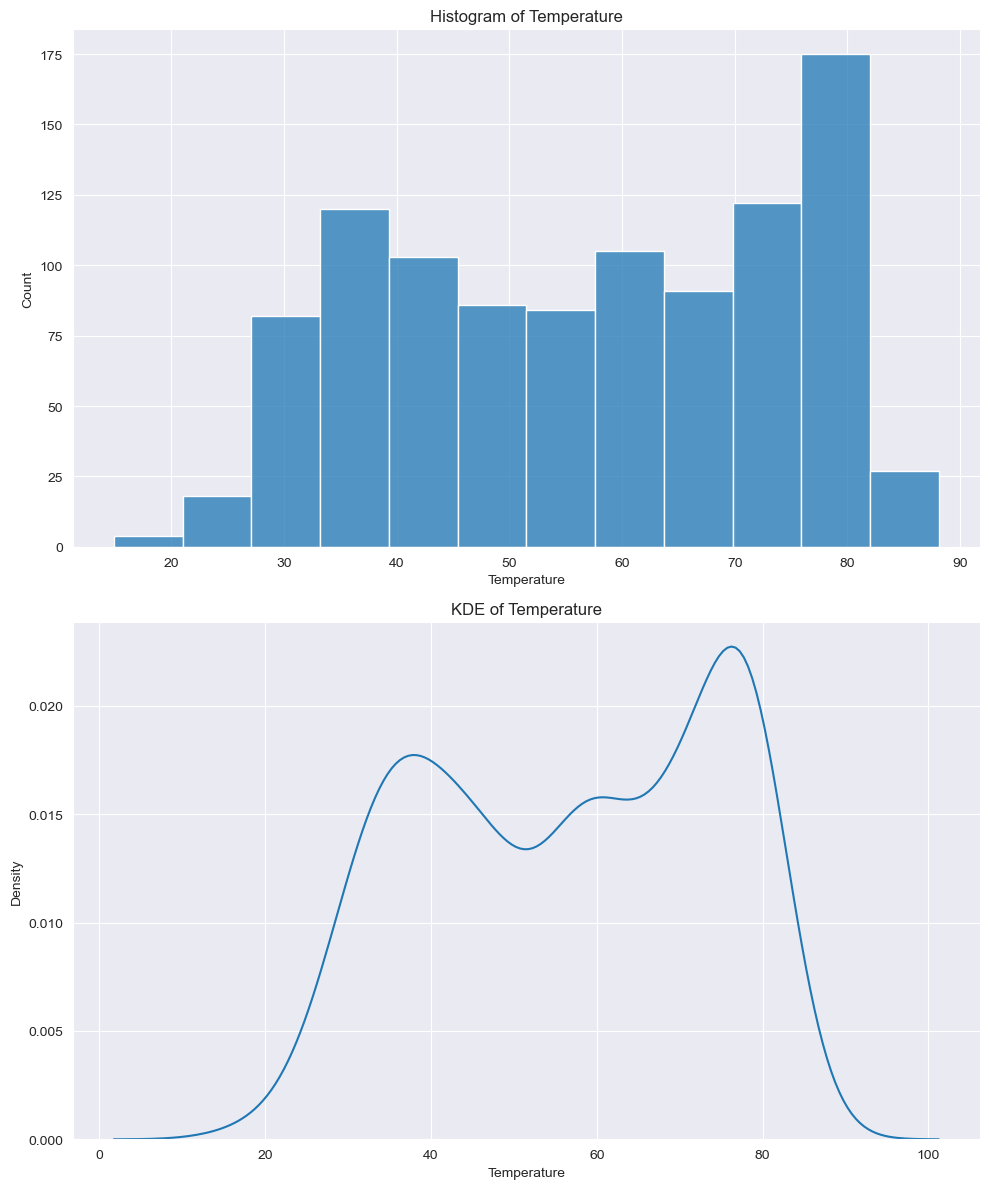

In [9]:
fig, axs = plt.subplots(2, figsize=(10,12))

sns.histplot(df['Value'], ax=axs[0])
axs[0].set_xlabel('Temperature')
axs[0].set_ylabel('Count')
axs[0].set_title('Histogram of Temperature')

sns.kdeplot(df['Value'], ax=axs[1])
axs[1].set_xlabel('Temperature')
axs[1].set_ylabel('Density')
axs[1].set_title('KDE of Temperature')

plt.tight_layout()
plt.show()

In [10]:
df.describe()

,Value
count,1017.000000
mean,56.828614
std,17.508026
min,14.900000
25%,40.700000
50%,58.500000
75%,73.600000
max,88.100000
